In [1]:
import torch
from torchvision.models import *
from fastai.vision import *

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import torchvision.models as models

In [3]:
import gc

In [4]:
# Getting our paths 
images_path = f'{os.curdir}/model_data/images_unscattered'
labels_path = f'{os.curdir}/model_data/unscattered.csv'
path = f'{os.curdir}/model_data'

In [5]:
tfms_ = get_transforms(do_flip=False, flip_vert=False, max_rotate=0.0, max_zoom=0.2, max_lighting=0.1, max_warp=0.0)

# Creating source object
seed = np.random.seed(42)
src = (ImageList.from_csv(path, csv_name='unscattered.csv', folder='images_unscattered', suffix='.png')
                     .split_by_rand_pct(0.1, seed)
                     .label_from_df())

# Creating data object function - returns data object
def get_data(image_size, batch_size):
    data = (src.transform(tfms=tfms_, size=image_size)
               .databunch(num_workers=2, bs=batch_size).normalize(imagenet_stats))
    
    return data

In [6]:
data = get_data((200, 300), 8)

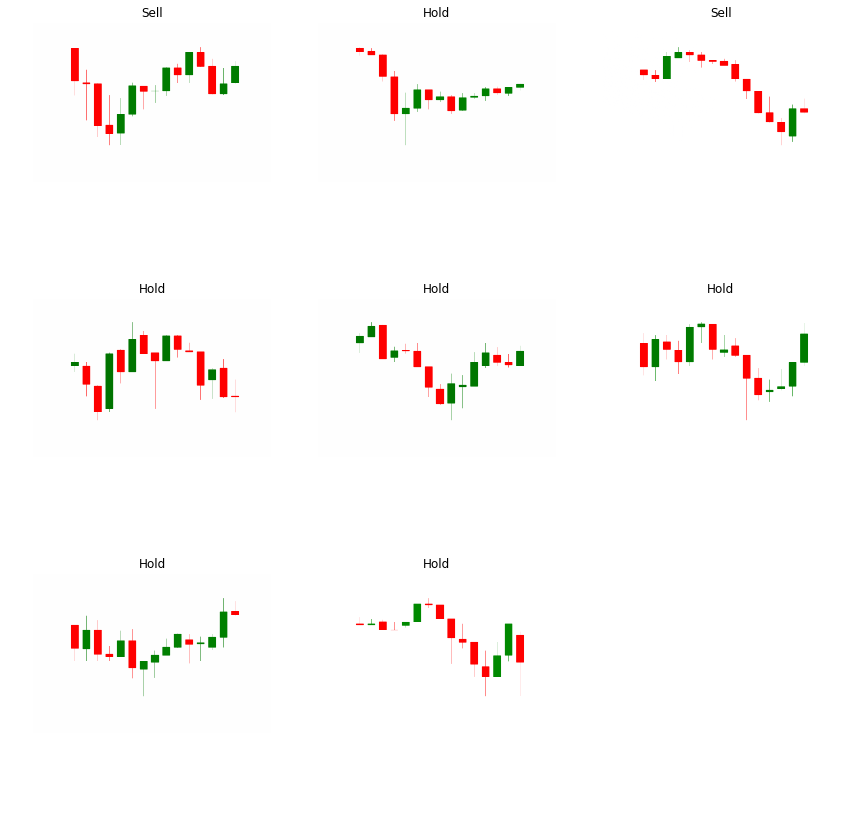

In [8]:
data.show_batch()

In [9]:
data

ImageDataBunch;

Train: LabelList (10782 items)
x: ImageList
Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300)
y: CategoryList
Hold,Hold,Hold,Hold,Hold
Path: model_data;

Valid: LabelList (1198 items)
x: ImageList
Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300),Image (3, 200, 300)
y: CategoryList
Hold,Hold,Hold,Hold,Hold
Path: model_data;

Test: None

In [8]:
arch = models.resnext50_32x4d

learn = create_cnn(data, arch, metrics=[accuracy])

/opt/conda/envs/fastai/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 100441675/100441675 [00:02<00:00, 42492726.54it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


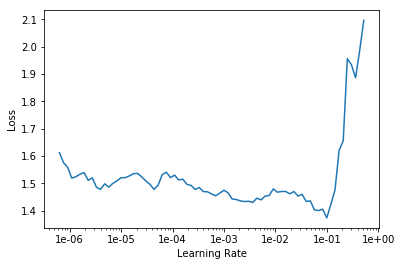

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 7e-3

In [11]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.641175,0.569810,0.827212,03:25
1,0.577964,0.939687,0.801336,03:18
2,0.555049,0.829705,0.809683,03:19
3,0.525117,0.731883,0.818865,03:20
4,0.518755,0.766085,0.808848,03:24


In [8]:
arch = models.resnext101_32x8d

learn = cnn_learner(data, arch, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


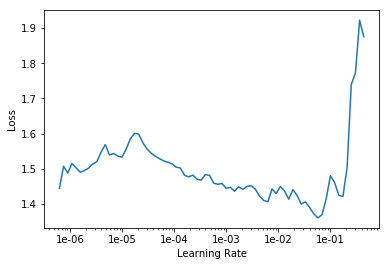

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
lr = 6e-2

In [11]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.371727,1.008294,0.787980,07:06
1,1.250052,0.852254,0.669449,07:05
2,0.856057,193.564041,0.749583,07:06
3,0.576359,1.984616,0.823873,07:06
4,0.469277,1.399512,0.813856,07:05
